# Aprender a programar Basic set up

notebook exploring LDA to see the number of clusters generated fr the survey data. To examine the best number of clusters we use coherence score c_v and u_mass; other methods like  silhouette coefﬁcient are not appropiate for LDA direct output data.


-Results : obtained scores were low in general and very inconsistent.

-Remarks:
* the model is very sensitive, and small changes in the nomalization or preprocessing make complete different clusters and coherenec scores

#### install libraries

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing  # to normalize data for cosine similarity

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
#from gensim.models import CoherenceModel

# spacy for lemmatization
!pip install -U spacy
!python -m spacy download es
!python -m spacy download es_core_news_md
import spacy

# Plotting tools
#!pip install pyLDAvis
#import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline


#knee locator for clustering
!pip install kneed
!pip install ipython
from kneed import KneeLocator

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-27 02:58:50.294320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enab

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s eta 0:00:00


In [ ]:
#!pip install tensorflow==2.9.*
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
#tf_version = str(tf.__version__)[:-2]
#print(tf_version)
!pip install --quiet tensorflow-text==2.11.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 66.1 MB/s eta 0:00:00


In [ ]:
import string
import seaborn as sns
nlp = spacy.load('es_core_news_md')

In [ ]:
#from google.colab import files
#upload = files.upload()
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
df = pd.read_csv(r'/content/mydrive/MyDrive/luis/study/master/tesis/automaticLabels/aprenderAProgramarfinalDataFrame.csv',sep=';')
df

,comment,ambiente,bondadesPlataforma,CbondadesPlataformaCcasosPrueba,CbondadesPlataformaCconocerErrores,CbondadesPlataformaCconsejosFormativos,CbondadesPlataformaCdisponibilidadLinea,CbondadesPlataformaCespacioTrabajo,CbondadesPlataformaCfacilidadUso,CbondadesPlataformaClenguajes,...,ClogrosPedagogicosCresolucionProblemas,CMejorableAprenderProgramarCfallasGenerales,CMejorableAprenderProgramarCinflexibilidad,CMejorableAprenderProgramarCobjetivoEducativo,CMejorableAprenderProgramarCretroalimentacionInsuficiente,CMejorableAprenderProgramarCsustituible,colab,HerramientasUNcode,logrosPedagogicos,MejorableAprenderProgramar
0,A traves de la plataforma pude ir practicando ...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A traves de los ejercicios propuestos en la he...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,A veces UNCode no dejaba correr por cosas triv...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,A veces es poco practico y da errores por cosa...,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,"A veces la pagina era muy lenta, y al principi...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,si porque gracias a el pude constatar que mis ...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
343,"si, ya que es bastante sencillo e intuitivo a ...",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
344,solo lo use para enviar los talleres ya que lo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
345,uno de los aspectos que considero que mas me c...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.comment

0      A traves de la plataforma pude ir practicando ...
1      A traves de los ejercicios propuestos en la he...
2      A veces UNCode no dejaba correr por cosas triv...
3      A veces es poco practico y da errores por cosa...
4      A veces la pagina era muy lenta, y al principi...
                             ...                        
342    si porque gracias a el pude constatar que mis ...
343    si, ya que es bastante sencillo e intuitivo a ...
344    solo lo use para enviar los talleres ya que lo...
345    uno de los aspectos que considero que mas me c...
346    ya que proporcionaba todas las herramientas ne...
Name: comment, Length: 347, dtype: object

This shows there are comments with multiple categories, on average each comment will have 1.5 categories

In [ ]:
df.shape

(347, 29)

#### basic text cleaning

In [ ]:
df["comment"] = df["comment"].fillna("")
# for col in text_columns: # change df tyoes to string, it it is not
#     df[col] = df[col].astype(str)

In [ ]:
#limpieza basica que aplica para todo metodo sin importar cual sera
#method that overrides the given dataframe text, with a cleaned version
def clean(textArray):
  res= []
  for i in range(0,len(textArray)):
    text = textArray[i]
    #text = p.clean(text)
    #text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    text = re.sub(r"\d+", "number", text)# replace numbers with the word 'number'
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    # text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    # text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    # text = re.sub(
    #     f"[{re.escape(string.punctuation)}]", "", text
    # )  # Remove punctuation
    # don't consider sentenced with less than 3 words (i.e. assumed noise)
    #if len(text.strip().split()) < 3:
    #     return None
    text = text.lower()  # lower case everything
    test = text.strip() # remove redundant spaces
    textArray[i] = text
  return

In [ ]:
clean(df.comment) # df.comment will be cleaned and overwriten

<ipython-input-10-35969912d2a8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textArray[i] = text


In [ ]:
df.head(3)

,comment,ambiente,bondadesPlataforma,CbondadesPlataformaCcasosPrueba,CbondadesPlataformaCconocerErrores,CbondadesPlataformaCconsejosFormativos,CbondadesPlataformaCdisponibilidadLinea,CbondadesPlataformaCespacioTrabajo,CbondadesPlataformaCfacilidadUso,CbondadesPlataformaClenguajes,...,ClogrosPedagogicosCresolucionProblemas,CMejorableAprenderProgramarCfallasGenerales,CMejorableAprenderProgramarCinflexibilidad,CMejorableAprenderProgramarCobjetivoEducativo,CMejorableAprenderProgramarCretroalimentacionInsuficiente,CMejorableAprenderProgramarCsustituible,colab,HerramientasUNcode,logrosPedagogicos,MejorableAprenderProgramar
0,a traves de la plataforma pude ir practicando ...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a traves de los ejercicios propuestos en la he...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,a veces uncode no dejaba correr por cosas triv...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### advance data transformation step to convert similar words so results are more reliable

In [ ]:
#limpieza basica que aplica para todo metodo sin importar cual sera
#method that overrides the given dataframe text, with a cleaned version
def advanceCleaning(textArray):
  res= []
  for i in range(0,len(textArray)):
    text = textArray[i]
    #text = p.clean(text)
    #text = re.sub(r"uncode|plataforma|herramienta", "uncode", text)  # convert common words to the same synonym
    textArray[i] = text
  return

In [ ]:
#advanceCleaning(df.comment) # df.comment will be cleaned and overwriten

#### Dataset splitting in categories and test splitting

In [ ]:
# convert to dense dataframe, select only the columns of the big categories
selected_columns_only_categories = [col for col in df.columns if not col.startswith('C')]
selected_columns_only_categories.remove('comment')
categories_labels = df[selected_columns_only_categories]
categories_labels.sum()

ambiente                       14
bondadesPlataforma            169
colab                          10
HerramientasUNcode            129
logrosPedagogicos             192
MejorableAprenderProgramar     29
dtype: int64

In [ ]:
# convert to dense dataframe, select only the columns of the small subcategories
selected_columns_only_sub_categories = [col for col in df.columns if col.startswith('C')]
sub_categories_labels = df[selected_columns_only_sub_categories]
sub_categories_labels.sum()

CbondadesPlataformaCcasosPrueba                              10
CbondadesPlataformaCconocerErrores                           83
CbondadesPlataformaCconsejosFormativos                       31
CbondadesPlataformaCdisponibilidadLinea                       9
CbondadesPlataformaCespacioTrabajo                            4
CbondadesPlataformaCfacilidadUso                             43
CbondadesPlataformaClenguajes                                 5
CbondadesPlataformaCPracticaconstante                        20
CherramientasUNcodeCcustomInput                              32
CherramientasUNcodeClinter                                   29
CherramientasUNcodeCpythonTutor                              75
ClogrosPedagogicosCaprendizajeAutonomo                       13
ClogrosPedagogicosCejerciciosEstimulantes                    40
ClogrosPedagogicosCevalluacionEstimulante                    40
ClogrosPedagogicosCEvaluacionOptimizada                      80
ClogrosPedagogicosChabilidadesProgramaci

In [ ]:
X_train, X_test, y_train_categories, y_test_categories = train_test_split( df.comment.to_numpy(), categories_labels.to_numpy(), test_size=0.1, random_state=42)

In [ ]:
X_train, X_test, y_train_sub_categories, y_test_sub_categories = train_test_split( df.comment.to_numpy(), sub_categories_labels.to_numpy(), test_size=0.1, random_state=42)

#### Aditional optional text cleaning/normalization

In [ ]:
#normalizacion especifica, dependiendo del metodo se puede probar con y sin esta
def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if t.isalpha()] #len(t) > 3 and
    return lexical_tokens

#otra libreria para eliminar stop words
# import nltk
# from stop_words import get_stop_words
# dataset = ['This','is','just', 'a', 'snake']
# A = [word for word in dataset if word not in get_stop_words('english')]
# print(A)

In [ ]:
textNormalizedCommentsVector = [ ([str(a) for a in normalize(oneComment)]) for oneComment in X_train]
textNormalizedCommentsVector[0]

['util', 'practicar', 'temas', 'iban', 'viendo', 'clase']

In [ ]:
textNormalizedComments = [ " ".join([str(a) for a in normalize(oneComment)]) for oneComment in X_train]
textNormalizedComments[0]

'util practicar temas iban viendo clase'

#### stemming optional process to transfrom all word to the root(even if the root does not exist)

In [ ]:
import nltk
from nltk import SnowballStemmer

def stemmize(text):
  spanishstemmer=SnowballStemmer('spanish')
  tokens = normalize(text) # crear una lista de tokens
  stems = [spanishstemmer.stem(token) for token in tokens]
  return stems

In [ ]:
stemmize(textNormalizedComments)

['util', 'practic', 'tem', 'iban', 'viend', 'clas']

In [ ]:
dataStemmizedCommentsVector = [ ([str(a) for a in stemmize(oneComment)]) for oneComment in textNormalizedComments]
dataStemmizedCommentsVector[0]

['util', 'practic', 'tem', 'iban', 'viend', 'clas']

In [ ]:
dataStemmizedComments = [ " ".join([str(a) for a in oneComment]) for oneComment in dataStemmizedCommentsVector]
dataStemmizedComments

['util practic tem iban viend clas',
 'pas pas ejecucion program cas prueb predefin form aprend program',
 'proponi bastant situacion teni opcion prob codig acced vist detall codig plus cas prueb podi codig cumpli cabal funcional',
 'permiti practic concept aprend clas',
 'cod ayud aprend herramient evaluacion codig gui programacion',
 'util obten retroalimentacion inmediat funcion codig bas result obten esper permit correg error progres march avanz solucion correct',
 'herramient ofrec herramient util hor program permit error cometi estudi ofrec altern solucion ofrec flexibil docent evaluacion ejercici personal piens herramient deberi segu utiliz',
 'facilit presentacion taller',
 'valor porcentaj codig correct',
 'permiti tiemp codig permit correg dand consej escrib adecu codig',
 'util ensen estrict manej condicion establec ejecucion codig',
 'eficient hor revis program',
 'taller desarroll mayori herramient pagin aplic',
 'herramient util muestr cas prueb analiz error',
 'plataform

#### lemmatization, optional procces to transform words to a common one

In [ ]:
# def lemmanize(text):
#     doc = nlp(text)
#     #lemmas_no_pron = [tok.lemma_.lower() for tok in doc if tok.pos_ != 'PRON'] # we can select the type of tokens that will enter this process, like pronouns, adjetivo, verbo, sustantivo
#     #lemmas = [tok.lemma_ for tok in doc if tok.pos_ != 'NOUN']
#     lemmas = []
#     for tok in doc:
#       if tok.pos_ not in ("NOUN", "NUM", "PROPN"):
#         lemmas.append((tok.lemma_))
#       else:
#         lemmas.append((tok.text))
#     return lemmas


In [ ]:
# lemmanize(textNormalizedComments[0])

In [ ]:
# dataLemmatizedCommentsVector = [ ([str(a) for a in lemmanize(oneComment)]) for oneComment in textNormalizedComments]
# dataLemmatizedCommentsVector[0]

### USE (universal sentence encoder) like SBERT

In [ ]:
## google embeddings model  https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3
tf.compat.v1.estimator.experimental.dnn_logit_fn_builder
import tensorflow_hub as hub
import tensorflow_text  # this needs to be imported to set up some stuff in the background
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
useEmbedding=embed(dataStemmizedComments)
useEmbedding #The input to the module is variable length text in any of the aforementioned languages and the output is a 512 dimensional vector

<tf.Tensor: shape=(312, 512), dtype=float32, numpy=
array([[ 0.07025307,  0.01526847,  0.00271247, ..., -0.01839368,
         0.059466  ,  0.02294832],
       [ 0.00475718,  0.03207358,  0.0712318 , ...,  0.063783  ,
        -0.03900088,  0.01203934],
       [-0.00371857,  0.05896687,  0.05250262, ..., -0.01871949,
        -0.01747267,  0.02731175],
       ...,
       [-0.04701436, -0.02578573, -0.01284837, ..., -0.06870965,
        -0.03635765, -0.04298115],
       [ 0.01148024,  0.0333562 ,  0.02386422, ...,  0.00520501,
        -0.05786423, -0.01412949],
       [-0.0159827 , -0.01233323,  0.04344884, ...,  0.03355019,
         0.00623092, -0.04622378]], dtype=float32)>

### lda embedding

In [ ]:
import gensim
from pprint import pprint
from gensim.utils import simple_preprocess
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
# Create a corpus from a list of texts

num_topics=30

common_dictionary = Dictionary(dataStemmizedCommentsVector)
common_corpus = [common_dictionary.doc2bow(text) for text in dataStemmizedCommentsVector]
lda_model = gensim.models.LdaModel(common_corpus, num_topics=num_topics)
pprint(lda_model.print_topics())  #show_topics(num_topics=10, num_words=10, log=False, formatted=True)

[(25,
  '0.045*"35" + 0.044*"47" + 0.027*"4" + 0.027*"12" + 0.027*"17" + 0.027*"7" + '
  '0.027*"106" + 0.018*"57" + 0.018*"41" + 0.018*"83"'),
 (16,
  '0.059*"41" + 0.027*"472" + 0.027*"216" + 0.027*"47" + 0.027*"7" + '
  '0.018*"89" + 0.018*"9" + 0.014*"54" + 0.014*"165" + 0.014*"156"'),
 (29,
  '0.054*"12" + 0.037*"35" + 0.035*"10" + 0.030*"41" + 0.029*"56" + 0.021*"83" '
  '+ 0.020*"112" + 0.020*"17" + 0.020*"4" + 0.018*"6"'),
 (27,
  '0.034*"12" + 0.031*"35" + 0.026*"89" + 0.026*"431" + 0.026*"408" + '
  '0.022*"31" + 0.021*"56" + 0.017*"127" + 0.017*"205" + 0.017*"153"'),
 (11,
  '0.031*"41" + 0.031*"23" + 0.031*"134" + 0.031*"31" + 0.031*"89" + '
  '0.031*"12" + 0.031*"191" + 0.016*"316" + 0.016*"95" + 0.016*"56"'),
 (14,
  '0.049*"17" + 0.049*"41" + 0.046*"35" + 0.030*"190" + 0.020*"30" + '
  '0.020*"10" + 0.020*"85" + 0.020*"200" + 0.020*"301" + 0.020*"114"'),
 (0,
  '0.035*"2" + 0.035*"3" + 0.035*"4" + 0.035*"590" + 0.018*"214" + 0.018*"41" '
  '+ 0.018*"5" + 0.018*"35" + 0.0

In [ ]:
from pandas._libs.lib import fast_unique_multiple_list_gen
#list of or each document

#lda_model.get_document_topics(common_corpus).toArray()[0]

get_document_topics = [lda_model.get_document_topics(item) for item in common_corpus]


get_document_topicsRaw  =[]
for item in common_corpus:
  array =lda_model.get_document_topics(item, 0.5)
  partialResult =[]
  for item2 in range(num_topics):
    indexFound = False
    for item3 in array:
      if (item3[0]==item2):
        partialResult.append(item3[1])
        indexFound = True
    if (not indexFound):
      partialResult.append(0)

  get_document_topicsRaw.append(partialResult)


pprint(get_document_topicsRaw)  #show_topics(num_topics=10, num_words=10, log=False, formatted=True)


Streaming output truncated to the last 5000 lines.
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.93095237,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.9194444,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.7583333,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.8388889,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.8388889,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0.9194444,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

### CLUTERING ALGORITHM spectral

In [ ]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(random_state=5).fit(useEmbedding)
clustering

AffinityPropagation(random_state=5)

In [ ]:
bestFoundClusterNumber = max(clustering.labels_) + 1
clustering_array = clustering.labels_

In [ ]:

comments_df= pd.DataFrame()
comments_df['data_index'] = X_train
comments_df['cluster'] = clustering.labels_

comments_df

,data_index,cluster
0,era muy util para practicar todo los temas que...,35
1,el poder ver paso por paso la ejecucion del pr...,9
2,debido a que se nos proponian bastantes situac...,22
3,porque me permitia practicar algunas conceptos...,0
4,"porque en si un code no ayuda a aprender, es u...",36
...,...,...
307,permitia ver en casos especificos el programa ...,36
308,es una gran herramienta que permite ver paso a...,16
309,facilita el uso de una interfaz de manera rapi...,24
310,"si bien muestra un paso a paso del codigo, y p...",34


### CLUTERING ALGORITHM kmeans

In [ ]:
from sklearn.cluster import  KMeans

bestFoundClusterNumber = 6

clustering = KMeans( init="random",n_clusters=bestFoundClusterNumber,n_init=10,max_iter=300,random_state=42).fit(get_document_topicsRaw)

In [ ]:
bestFoundClusterNumber = max(clustering.labels_) + 1
clustering_array = clustering.labels_

In [ ]:

comments_df= pd.DataFrame()
comments_df['data_index'] = X_train
comments_df['cluster'] = clustering.labels_

comments_df

,data_index,cluster
0,era muy util para practicar todo los temas que...,0
1,el poder ver paso por paso la ejecucion del pr...,0
2,debido a que se nos proponian bastantes situac...,4
3,porque me permitia practicar algunas conceptos...,0
4,"porque en si un code no ayuda a aprender, es u...",0
...,...,...
307,permitia ver en casos especificos el programa ...,0
308,es una gran herramienta que permite ver paso a...,0
309,facilita el uso de una interfaz de manera rapi...,0
310,"si bien muestra un paso a paso del codigo, y p...",1


### CLUTERING ALGORITHM spectral clustering

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=6,
assign_labels='discretize',
random_state=0).fit(get_document_topicsRaw)

In [ ]:
bestFoundClusterNumber = max(clustering.labels_) +1
clustering_array = clustering.labels_

In [ ]:

comments_df= pd.DataFrame()
comments_df['data_index'] = X_train
comments_df['cluster'] = clustering.labels_

comments_df

,data_index,cluster
0,era muy util para practicar todo los temas que...,1
1,el poder ver paso por paso la ejecucion del pr...,1
2,debido a que se nos proponian bastantes situac...,2
3,porque me permitia practicar algunas conceptos...,1
4,"porque en si un code no ayuda a aprender, es u...",1
...,...,...
307,permitia ver en casos especificos el programa ...,1
308,es una gran herramienta que permite ver paso a...,1
309,facilita el uso de una interfaz de manera rapi...,1
310,"si bien muestra un paso a paso del codigo, y p...",3


# assigment of clusters to categories

In [ ]:
# Initialize the coincidence matrix
coincidence_matrix = np.zeros((bestFoundClusterNumber, y_train_categories.shape[1]))

# Initialize the  perfect possible results matrix
perfect_results_matrix = np.zeros((bestFoundClusterNumber, y_train_categories.shape[1]))

# Initialize the  coincidence matrix in percentages
coincidence_matrix_percentage = np.zeros((bestFoundClusterNumber, y_train_categories.shape[1]))

# Iterate over each category and each column in the matrix
for i in range(bestFoundClusterNumber):
    # the external  loop changes the clusters calculated by clustering
    for j in range(y_train_categories.shape[1]):
        # the internal loop changes the categories given at the beginning
        # Calculate the number of coincidences between the category and the column
        coincidence = np.sum(clustering_array[y_train_categories[:, j] == 1] == i) # first filter the the elemnts of the array on one category that are true, then of those
        total_real_ocurrences = np.sum(y_train_categories[:, j] == 1)

        # perfect possible results matrix
        perfect_results_matrix[i, j] = total_real_ocurrences

        # Store the coincidence in the matrix
        coincidence_matrix[i, j] = coincidence

        # Store the coincidence in the matrix in percentage
        coincidence_matrix_percentage[i, j] = coincidence/total_real_ocurrences


# Graph of the coincidence matrix in percentages
# names of the real columns are in the array categories_labels.columns




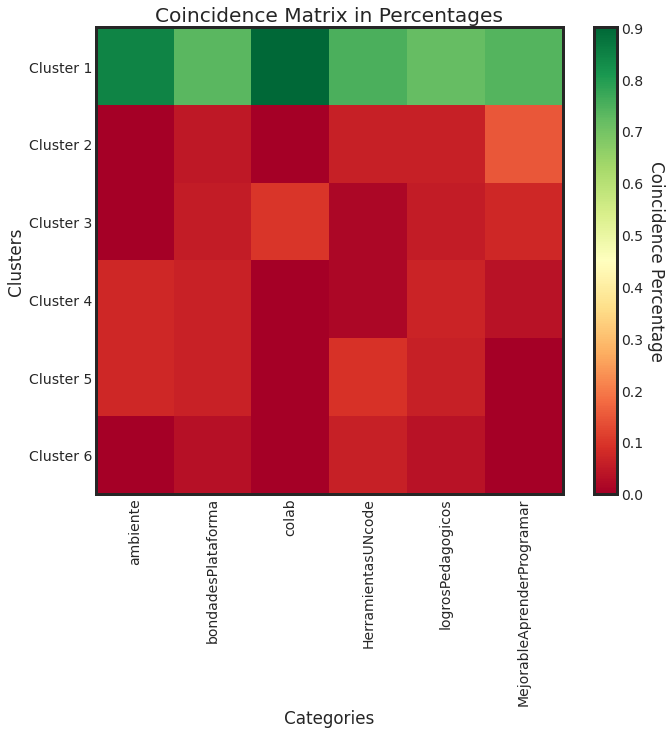

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(coincidence_matrix_percentage, cmap=plt.cm.get_cmap('RdYlGn'))

# Set x-axis and y-axis tick labels
ax.set_xticks(np.arange(y_train_categories.shape[1]))
ax.set_xticklabels(categories_labels.columns, rotation=90)
ax.set_yticks(np.arange(bestFoundClusterNumber))
ax.set_yticklabels(['Cluster ' + str(i+1) for i in range(bestFoundClusterNumber)])

# Create a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Coincidence Percentage', rotation=-90, va="bottom")

# Set plot title and labels
ax.set_title('Coincidence Matrix in Percentages')
ax.set_xlabel('Categories')
ax.set_ylabel('Clusters')

plt.show()

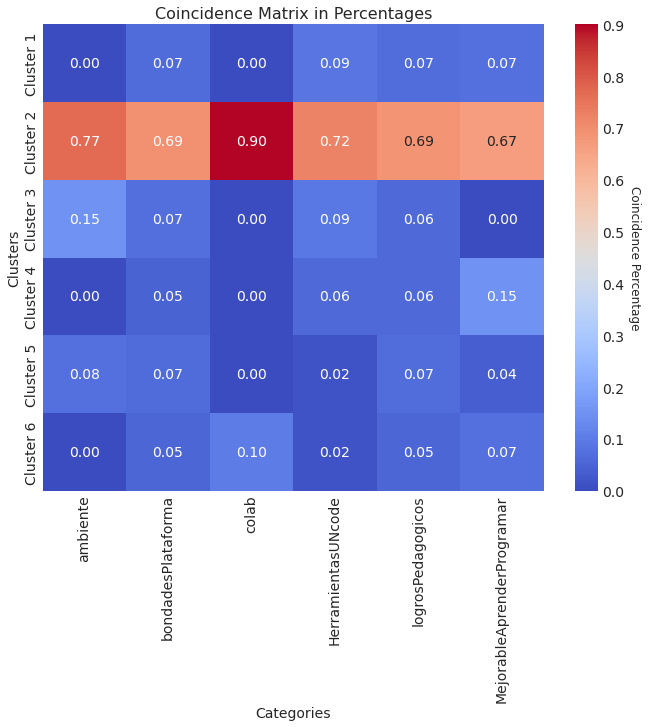

In [ ]:

# Set the style of the plot
sns.set_style('white')

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(coincidence_matrix_percentage, cmap='coolwarm', annot=True, fmt='.2f',
            xticklabels=categories_labels.columns, yticklabels=['Cluster ' + str(i+1) for i in range(bestFoundClusterNumber)], ax=ax)

# Set the title and labels
ax.set_title('Coincidence Matrix in Percentages', fontsize=16)
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Clusters', fontsize=14)

# Set the colorbar label
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Coincidence Percentage', rotation=-90, va="bottom", fontsize=12)

plt.show()

# assigment of clusters to sub_categories


In [ ]:
# Initialize the coincidence matrix
coincidence_matrix = np.zeros((bestFoundClusterNumber, y_train_sub_categories.shape[1]))

# Initialize the  perfect possible results matrix
perfect_results_matrix = np.zeros((bestFoundClusterNumber, y_train_sub_categories.shape[1]))

# Initialize the  coincidence matrix in percentages
coincidence_matrix_percentage = np.zeros((bestFoundClusterNumber, y_train_sub_categories.shape[1]))

# Iterate over each category and each column in the matrix
for i in range(bestFoundClusterNumber):
    # the external  loop changes the clusters calculated by clustering
    for j in range(y_train_sub_categories.shape[1]):
        # the internal loop changes the categories given at the beginning
        # Calculate the number of coincidences between the category and the column
        coincidence = np.sum(clustering_array[y_train_sub_categories[:, j] == 1] == i) # first filter the the elemnts of the array on one category that are true, then of those
        total_real_ocurrences = np.sum(y_train_sub_categories[:, j] == 1)

        # perfect possible results matrix
        perfect_results_matrix[i, j] = total_real_ocurrences

        # Store the coincidence in the matrix
        coincidence_matrix[i, j] = coincidence

        # Store the coincidence in the matrix in percentage
        coincidence_matrix_percentage[i, j] = coincidence/total_real_ocurrences


# Graph of the coincidence matrix in percentages
# names of the real columns are in the array categories_labels.columns




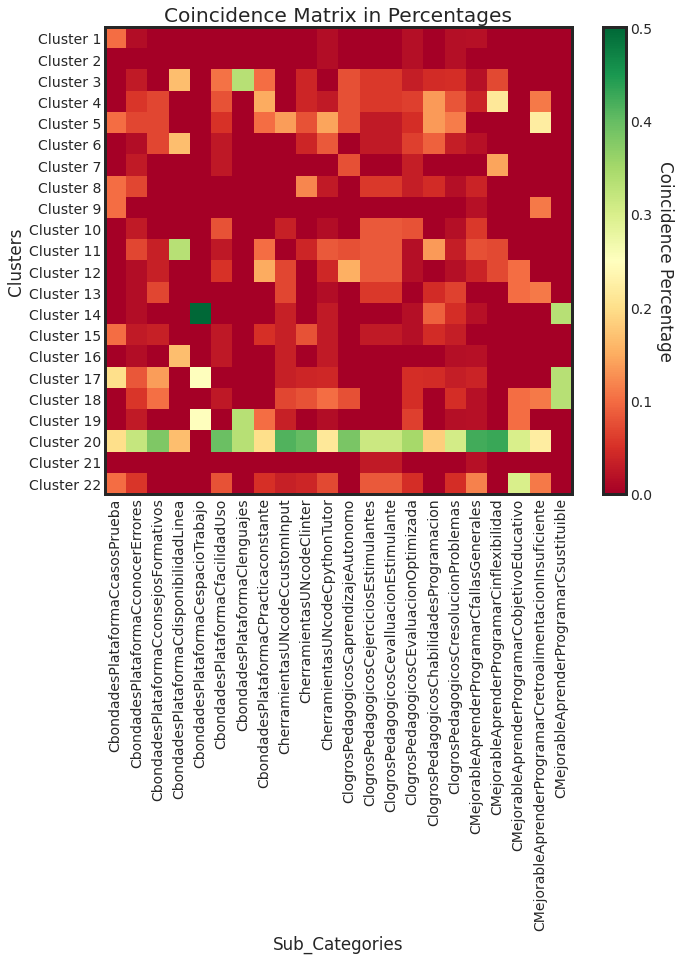

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(coincidence_matrix_percentage, cmap=plt.cm.get_cmap('RdYlGn'))

# Set x-axis and y-axis tick labels
ax.set_xticks(np.arange(y_train_sub_categories.shape[1]))
ax.set_xticklabels(sub_categories_labels.columns, rotation=90)
ax.set_yticks(np.arange(bestFoundClusterNumber))
ax.set_yticklabels(['Cluster ' + str(i+1) for i in range(bestFoundClusterNumber)])

# Create a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Coincidence Percentage', rotation=-90, va="bottom")

# Set plot title and labels
ax.set_title('Coincidence Matrix in Percentages')
ax.set_xlabel('Sub_Categories')
ax.set_ylabel('Clusters')

plt.show()

# Kmeans clustering

by default euclean distance is used as a similarity measurement in this kmeans

In [ ]:
#https://github.com/ashishsalunkhe/Topic-Modeling-using-LDA-and-K-Means-Clustering/blob/master/kmeans-cluster-and-topic-modeling.ipynb
#https://github.com/ashishsalunkhe/Topic-Modeling-using-LDA-and-K-Means-Clustering/blob/master/news_exploration_using_gensim_and_sklearn.ipynb

In [ ]:
kmeans = KMeans( init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)  #model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)

In [ ]:
kmeans.fit(useEmbedding)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
# The lowest SSE value
kmeans.inertia_
print(kmeans.inertia_)
# Final locations of the centroid
kmeans.cluster_centers_
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

204.30709051239262
[[ 0.00361656 -0.00127508 -0.01130604 ... -0.01653389  0.00763686
   0.02354838]
 [ 0.02340219  0.00551501 -0.0144581  ... -0.00480814  0.02498601
   0.00619285]
 [ 0.02092385 -0.00067426  0.00955498 ... -0.02614223  0.01588308
   0.00753973]]
14


#### elbow method to get best number of clusters

In [ ]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 400,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(useEmbedding)
    sse.append(kmeans.inertia_)

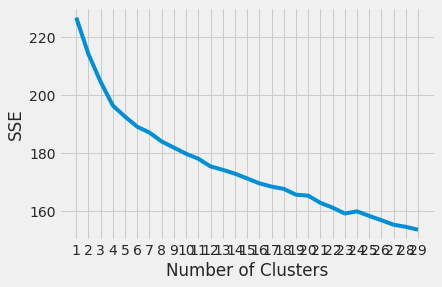

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")  # y axis SSE = sum of the squared error (SSE) after the centroids converge
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 30), sse, curve="convex", direction="decreasing"
)

kl.elbow

12

#### The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(useEmbedding)
    score = silhouette_score(useEmbedding, kmeans.labels_)
    silhouette_coefficients.append(score)

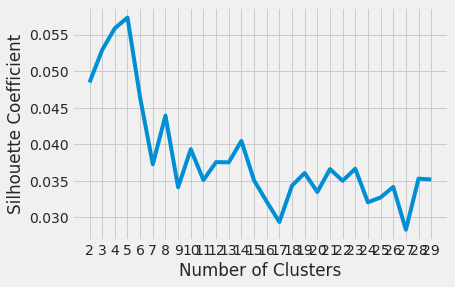

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### the same using cosine similarity(for this we must normalize the data

In [ ]:
from sklearn import preprocessing

#### elbow method to get best number of clusters/ 2 attempt

In [ ]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 400,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(preprocessing.normalize(useEmbedding))
    sse.append(kmeans.inertia_)

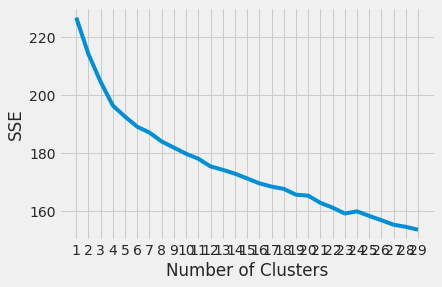

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")  # y axis SSE = sum of the squared error (SSE) after the centroids converge
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 30), sse, curve="convex", direction="decreasing"
)

kl.elbow

12

### k means retrieve clusters

In [ ]:
bestFoundClusterNumber = 12
kmeansBest = KMeans( init="random",n_clusters=bestFoundClusterNumber,n_init=10,max_iter=300,random_state=42)  #model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)\\
kmeansBest.fit(useEmbedding)

comments_df= pd.DataFrame()
comments_df['data_index'] = X_train
comments_df['cluster'] = kmeansBest.labels_

comments_df

,data_index,cluster
0,era muy util para practicar todo los temas que...,8
1,el poder ver paso por paso la ejecucion del pr...,4
2,debido a que se nos proponian bastantes situac...,5
3,porque me permitia practicar algunas conceptos...,8
4,"porque en si un code no ayuda a aprender, es u...",5
...,...,...
307,permitia ver en casos especificos el programa ...,7
308,es una gran herramienta que permite ver paso a...,2
309,facilita el uso de una interfaz de manera rapi...,1
310,"si bien muestra un paso a paso del codigo, y p...",6


#### similarity measurements

In [ ]:
print(cosine_similarity([useEmbedding[0],useEmbedding[35]]))
print(cosine_similarity([useEmbedding[0],useEmbedding[1]]))
print(euclidean_distances([useEmbedding[0],useEmbedding[1]]))
print(euclidean_distances([useEmbedding[0],useEmbedding[1]]))

[[1.0000002 0.131654 ]
 [0.131654  1.0000002]]
[[1.0000002  0.22388327]
 [0.22388327 1.        ]]
[[0.        1.2458867]
 [1.2458867 0.       ]]
[[0.        1.2458867]
 [1.2458867 0.       ]]


In [ ]:

pairwise_similarities=cosine_similarity(useEmbedding)
pairwise_differences=euclidean_distances(useEmbedding)

def most_similar(doc_id,similarity_matrix,matrix, comments):
  print (f'Document: {comments.iloc[doc_id]["data_index"]}')
  print ('\n')
  print ('Similar Documents:')
  if matrix=='Cosine Similarity':
      similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
  elif matrix=='Euclidean Distance':
      similar_ix=np.argsort(similarity_matrix[doc_id])
  for ix in similar_ix:
      if ix==doc_id:
          continue
      print('\n')
      print (f'Document: {comments.iloc[ix]["data_index"]}')
      print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

most_similar(20,pairwise_similarities,'Cosine Similarity', comments_df)


Document: porque brindo una amplia gamma de ejercicios que permitieron practicar el lenguaje.


Similar Documents:


Document: por ahi se desarrollaron diversos talleres, que ayudaban al entendimiento de las clases
Cosine Similarity : 0.5891156196594238


Document: porque dio un acceso rapido a las herramientas necesarias para programar y a la vez ofrecio distintos talleres que sirvieron de practica y aprendizaje
Cosine Similarity : 0.5722380876541138


Document: por que gracias a los ejercicios puestos en la plataforma pude desarrollar un pensamiento logico y resolver problemas de acuerdo a los temas tratados en clase.
Cosine Similarity : 0.5140551328659058


Document: porque me permitio realizar los ejercicios en un ambiente muy comodo, ademas es facil de manejar, lo que permite mejorar nuestras habilidades.
Cosine Similarity : 0.5097748041152954


Document: porque permite desarrollar ejercicios de forma clara con un sistema accesible y entenible.
Cosine Similarity : 0.50405383110046

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance', comments_df)

Document: era muy util para practicar todo los temas que iban viendo en la clase.


Similar Documents:


Document: dio la oportunidad de poner en practica los conocimientos adquiridos en las clases a pesar de la virtualidad. tambien fue muy util para identificar problemas y plantear diferentes soluciones segun fuesen requeridas
Euclidean Distance : 0.9000955820083618


Document: en esta plataforma habian ejercicios que hacian que pusiera en practica los conocimientos aprendidos en clase
Euclidean Distance : 0.9455743432044983


Document: ha sido util para subir ejercicios, comprobarlos y calificarlos, dejando en claro el proceso que sigue el codigo y apuntan los errores que haya cometido, haciendo que aprenda por medio de la retroalimentacion
Euclidean Distance : 0.96870356798172


Document: es una herramienta que permite la practica efectiva de los conceptos aprendidos en la clase. tambien funciona muy bien a la hora de comprender como funciona el codigo
Euclidean Distance : 0.9787805